# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path='dogs-vs-cats/train/'

In [4]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [5]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [6]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [7]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [8]:
classes = ['dog', 'cat']

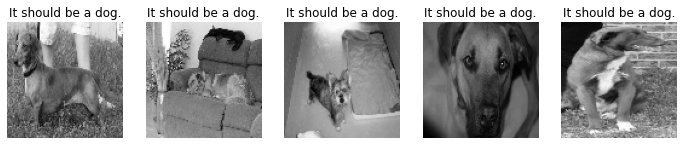

In [9]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

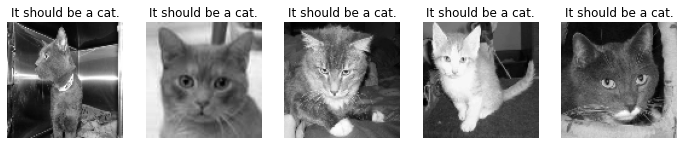

In [10]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [11]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [12]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float64') / 255
cats = np.asarray(cats).astype('float64') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [13]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [14]:
len(X)
X.shape, y.shape

((2222, 96, 96, 1), (2222,))

In [15]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='sigmoid'),
    Conv2D(32, (3,3), padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='sigmoid'),
    Conv2D(64, (3,3), padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________

In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [17]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2, shuffle = True,
          callbacks=[checkpointer])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1760/1777 [============================>.] - ETA: 0s - loss: 1.7410 - acc: 0.5989
Epoch 00001: val_loss improved from inf to 0.70337, saving model to model/dogs_vs_cats-cnn-01-0.7034.hdf5
1777/1777 [==============================] - 27s 15ms/sample - loss: 1.7317 - acc: 0.5976 - val_loss: 0.7034 - val_acc: 0.0000e+00
Epoch 2/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.7297 - acc: 0.5619
Epoch 00002: val_loss did not improve from 0.70337
1777/1777 [==============================] - 25s 14ms/sample - loss: 0.7305 - acc: 0.5622 - val_loss: 0.9758 - val_acc: 0.0000e+00
Epoch 3/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.7216 - acc: 0.5557
Epoch 00003: val_loss did not improve from 0.70337
1777/1777 [==============================] - 25s 14ms/sample - loss: 0.7216 - acc: 0.5560 - val_loss: 1.0570 - val_acc: 0.0000e+00
Epoch 4/40
1760/1777 [============================>.] - ETA: 0s - loss: 0

Epoch 31/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6676 - acc: 0.6182
Epoch 00031: val_loss did not improve from 0.70337
1777/1777 [==============================] - 25s 14ms/sample - loss: 0.6679 - acc: 0.6179 - val_loss: 1.0030 - val_acc: 0.0000e+00
Epoch 32/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6700 - acc: 0.6216
Epoch 00032: val_loss did not improve from 0.70337
1777/1777 [==============================] - 25s 14ms/sample - loss: 0.6693 - acc: 0.6230 - val_loss: 0.9413 - val_acc: 0.0000e+00
Epoch 33/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6699 - acc: 0.6227
Epoch 00033: val_loss did not improve from 0.70337
1777/1777 [==============================] - 25s 14ms/sample - loss: 0.6689 - acc: 0.6241 - val_loss: 1.0513 - val_acc: 0.0000e+00
Epoch 34/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6687 - acc: 0.6170
Epoch 00034: val_loss did not improve from 0.70337
1777/1777 [================

In [24]:
from tensorflow.keras.models import load_model
del model
model = load_model('../model/dogs_vs_cats-cnn-01-0.7034.hdf5')

NameError: name 'model' is not defined

In [21]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

NameError: name 'model' is not defined